## Prediction de risque du cancer du sein

Le cancer du sein est l’un des types de cancer les plus courants chez les femmes. Une fois qu’elle se produit, les cellules cancéreuses peuvent se propager à d’autres parties du corps, ce qui les rend potentiellement mortelles. Les cellules cancéreuses du sein forment habituellement une tumeur qui peut être cancéreuse ou bénigne. Une tumeur cancéreuse est maligne, ce qui signifie qu’elle peut se développer et se propager à d’autres parties du corps. Une tumeur bénigne signifie que la tumeur peut se développer mais ne se propagera pas. Et c’est pourquoi nous avons choisi ce sujet comme le meilleur modèle en utilisant l’apprentissage automatique. Cela nous aidera plus tard à classer si une tumeur de cancer du sein est maligne ou bénigne. Ainsi, dans l’apprentissage machine c’est un problème de classification. L’ensemble de données que nous avons choisi est maintenu par l’Université de Californie, Irvine. L’ensemble de données contient 569 échantillons de cellules tumorales malignes et bénignes. 
* Les deux premières colonnes de l’ensemble de données contiennent les numéros d’identification des échantillons et le diagnostic correspondant (M=maligne, B=bénigne). 
* Les colonnes 3 à 32 contiennent 30 caractéristiques de valeur réelle qui ont été calculées à partir d’images numérisées des noyaux cellulaires, qui peuvent être utilisées pour construire un modèle permettant de prédire si une tumeur est bénigne ou maligne.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from scipy.stats import norm

In [3]:
data=pd.read_csv('data.csv') 
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.shape

(569, 32)

In [5]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

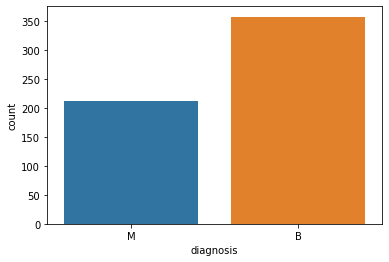

In [6]:
#visualise the count number of malignant and beningn cases
sns.countplot(data['diagnosis'])

In [7]:
#Review data types
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Nous pouvons voir que le diagnostic est une variable objet, parce qu’il représente 2 valeurs possibles soit M pour maligne ou B pour bénigne, mais dans l’apprentissage automatique nous n’avons pas besoin de variables chaîne comme entrées, donc nous devons les convertir.

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data.iloc[:,1]= labelencoder_Y.fit_transform(data.iloc[:,1].values)

In [9]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Descriptive statistics 

Pour que nous puissions regarder le résumé de chaque attribut, qui comprend le nombre, la moyenne, les valeurs min et max ainsi que certains percentiles.


In [10]:
#descriptive statistics 
data.iloc[:, 1:32].describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Visualisation des données

Pour la visualisation des données, nous utiliserons des histogrammes et des tracés de boîtes et de moustaches pour être en mesure de comprendre chaque attribut de notre ensemble de données indépendamment.
Cela nous donne une idée beaucoup plus claire de la distribution des attributs d’entrée.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D82F0A06C8>,
      dtype=object)

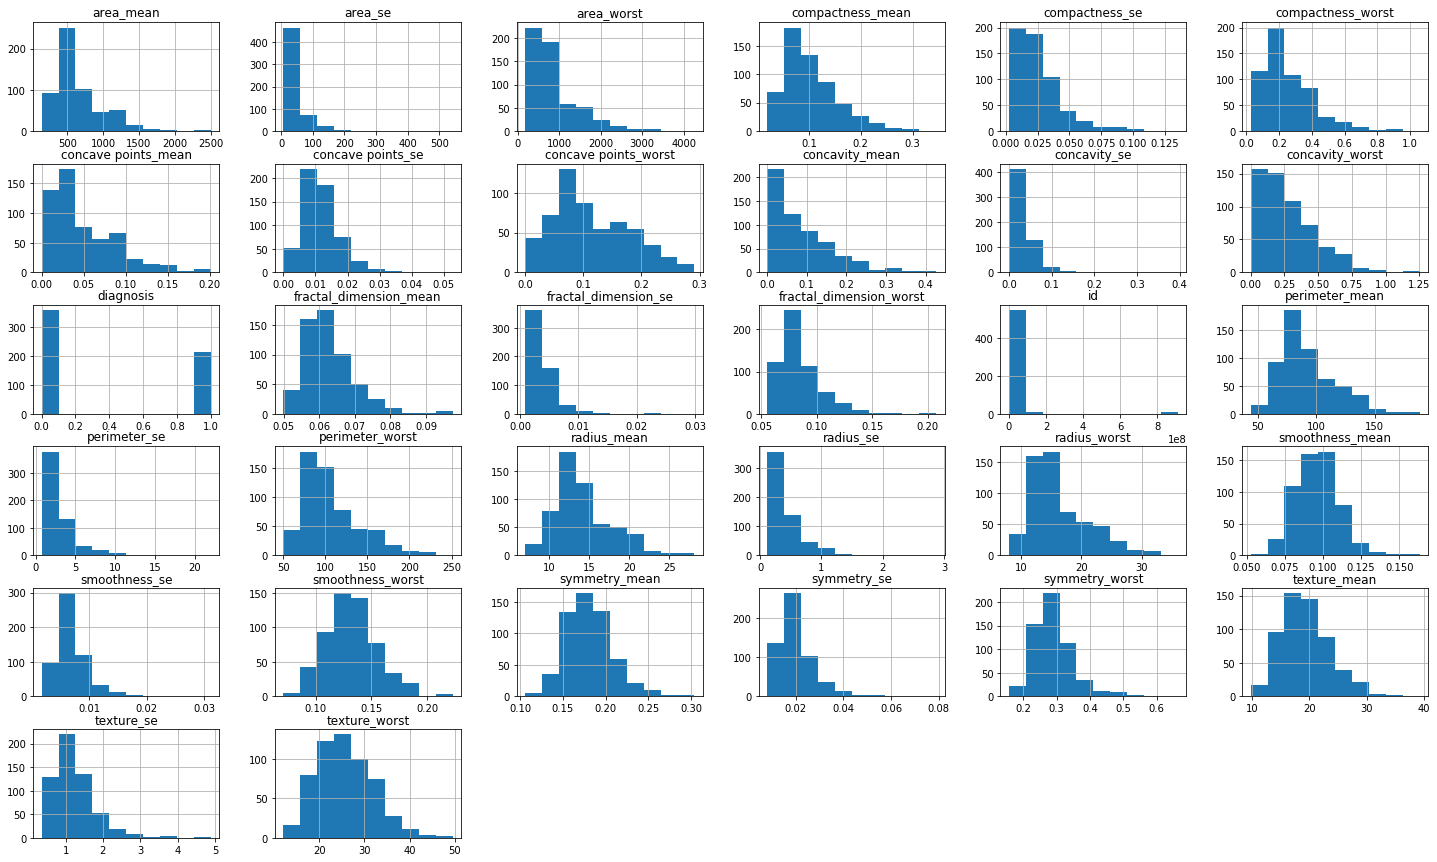

In [132]:
#Data Visualization

# plot histograms
data.hist(bins=10, figsize=(25, 15))


C:\Users\laara\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\laara\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\laara\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the 

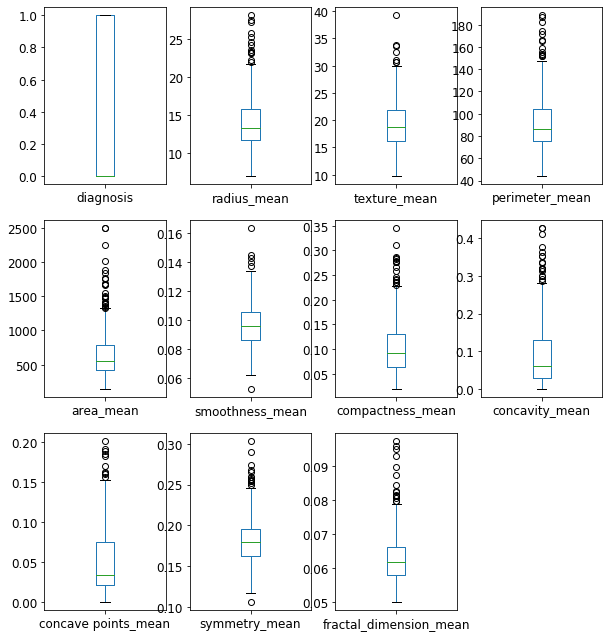

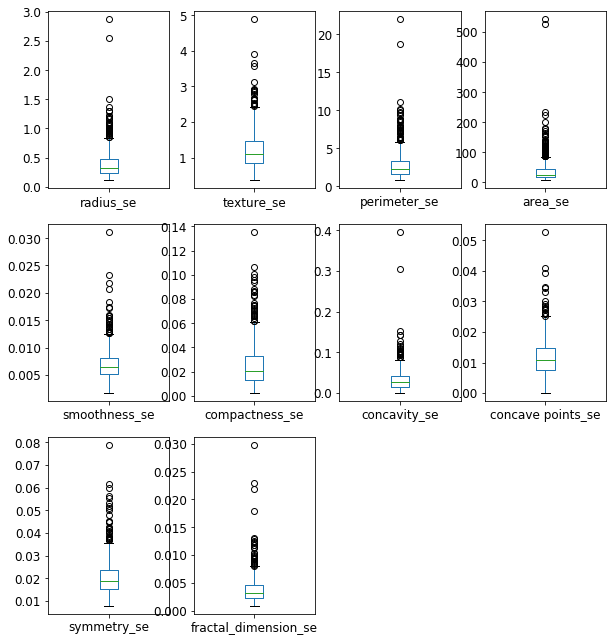

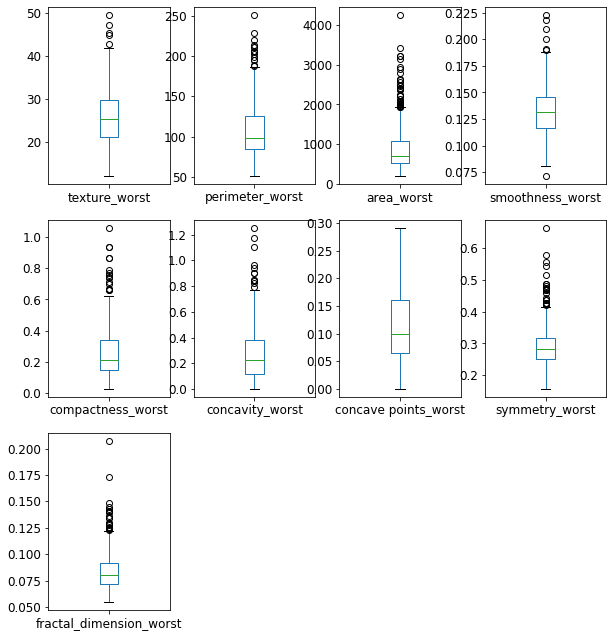

In [133]:

# box and whisker plots
data_mean=data.ix[:,1:12]
data_se=data.ix[:,12:22]
data_worst=data.ix[:,23:]
plt=data_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12,figsize=(10, 15))
plt=data_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12,figsize=(10, 15))
plt=data_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12,figsize=(10, 15))


On peut voir qu’après l’utilisation de ces deux méthodes histogrammes et box et wisker plots que les variables concavity,et concavity_point peuvent avoir une distribution exponentielle, et que les variables texture et les attributs lisses et symétriques peuvent avoir une distribution gaussienne ou presque gaussienne.

## Correlation

Nous pouvons maintenant examiner les interactions entre les variables.Nous allons d’abord utiliser la matrice de corrélation . Nous examinerons d’abord la corrélation des colonnes.

In [45]:
#Get the correlation of the columns
data.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


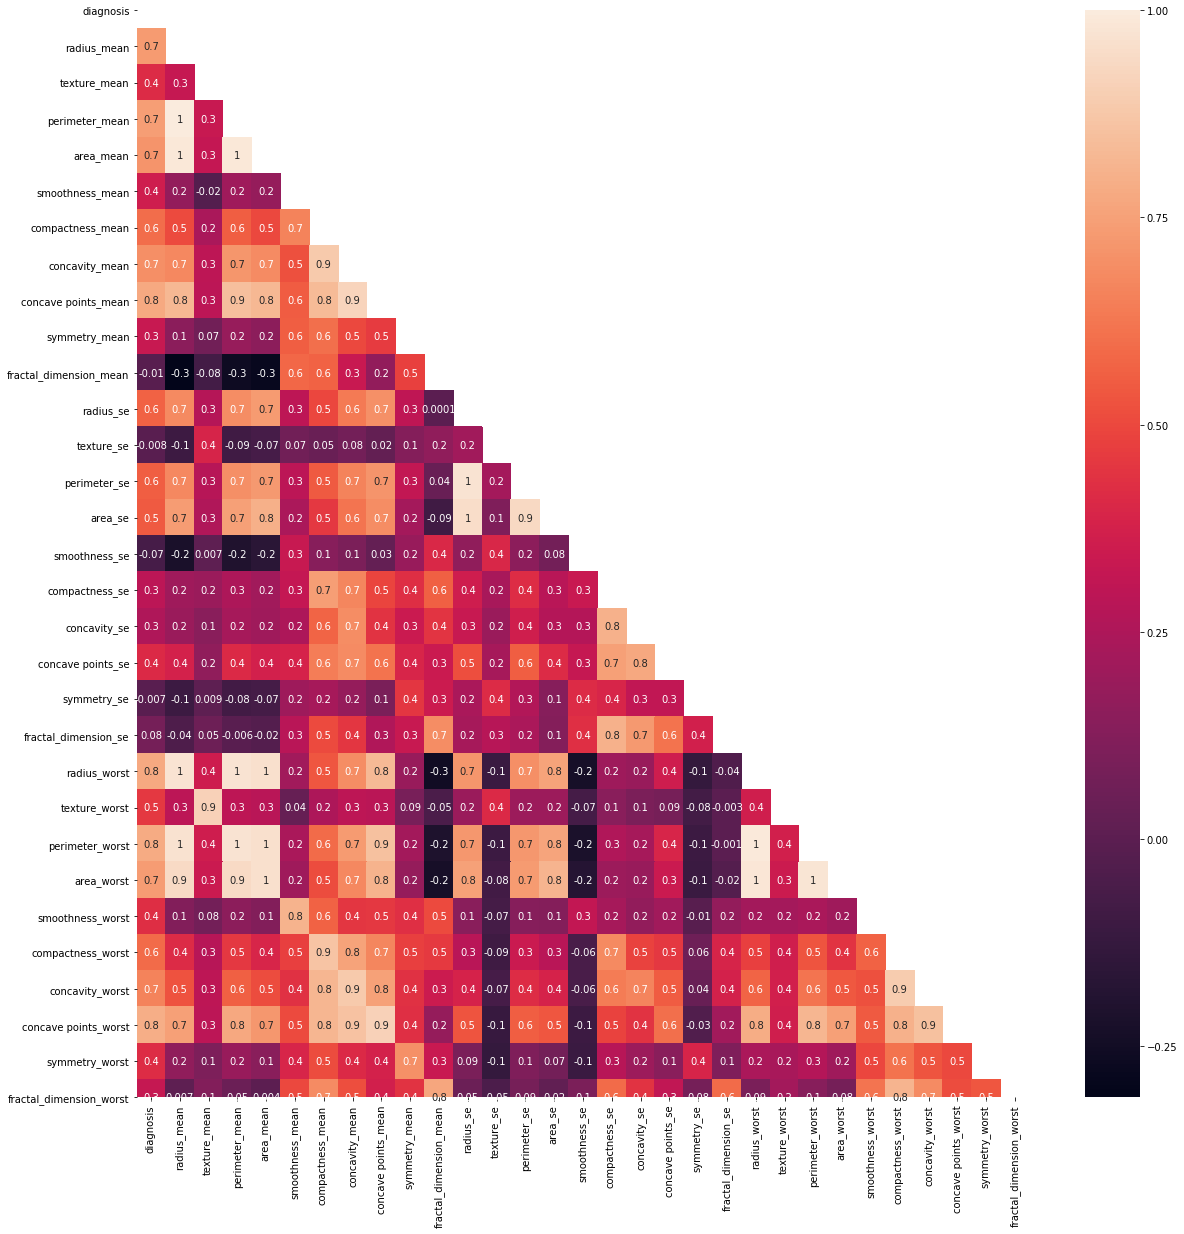

In [49]:
# Generate a mask for the upper triangle
mask = np.zeros_like(data.iloc[:,1:32].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))  
sns.heatmap(data.iloc[:,1:32].corr(),  mask=mask, annot=True, fmt='.001g')

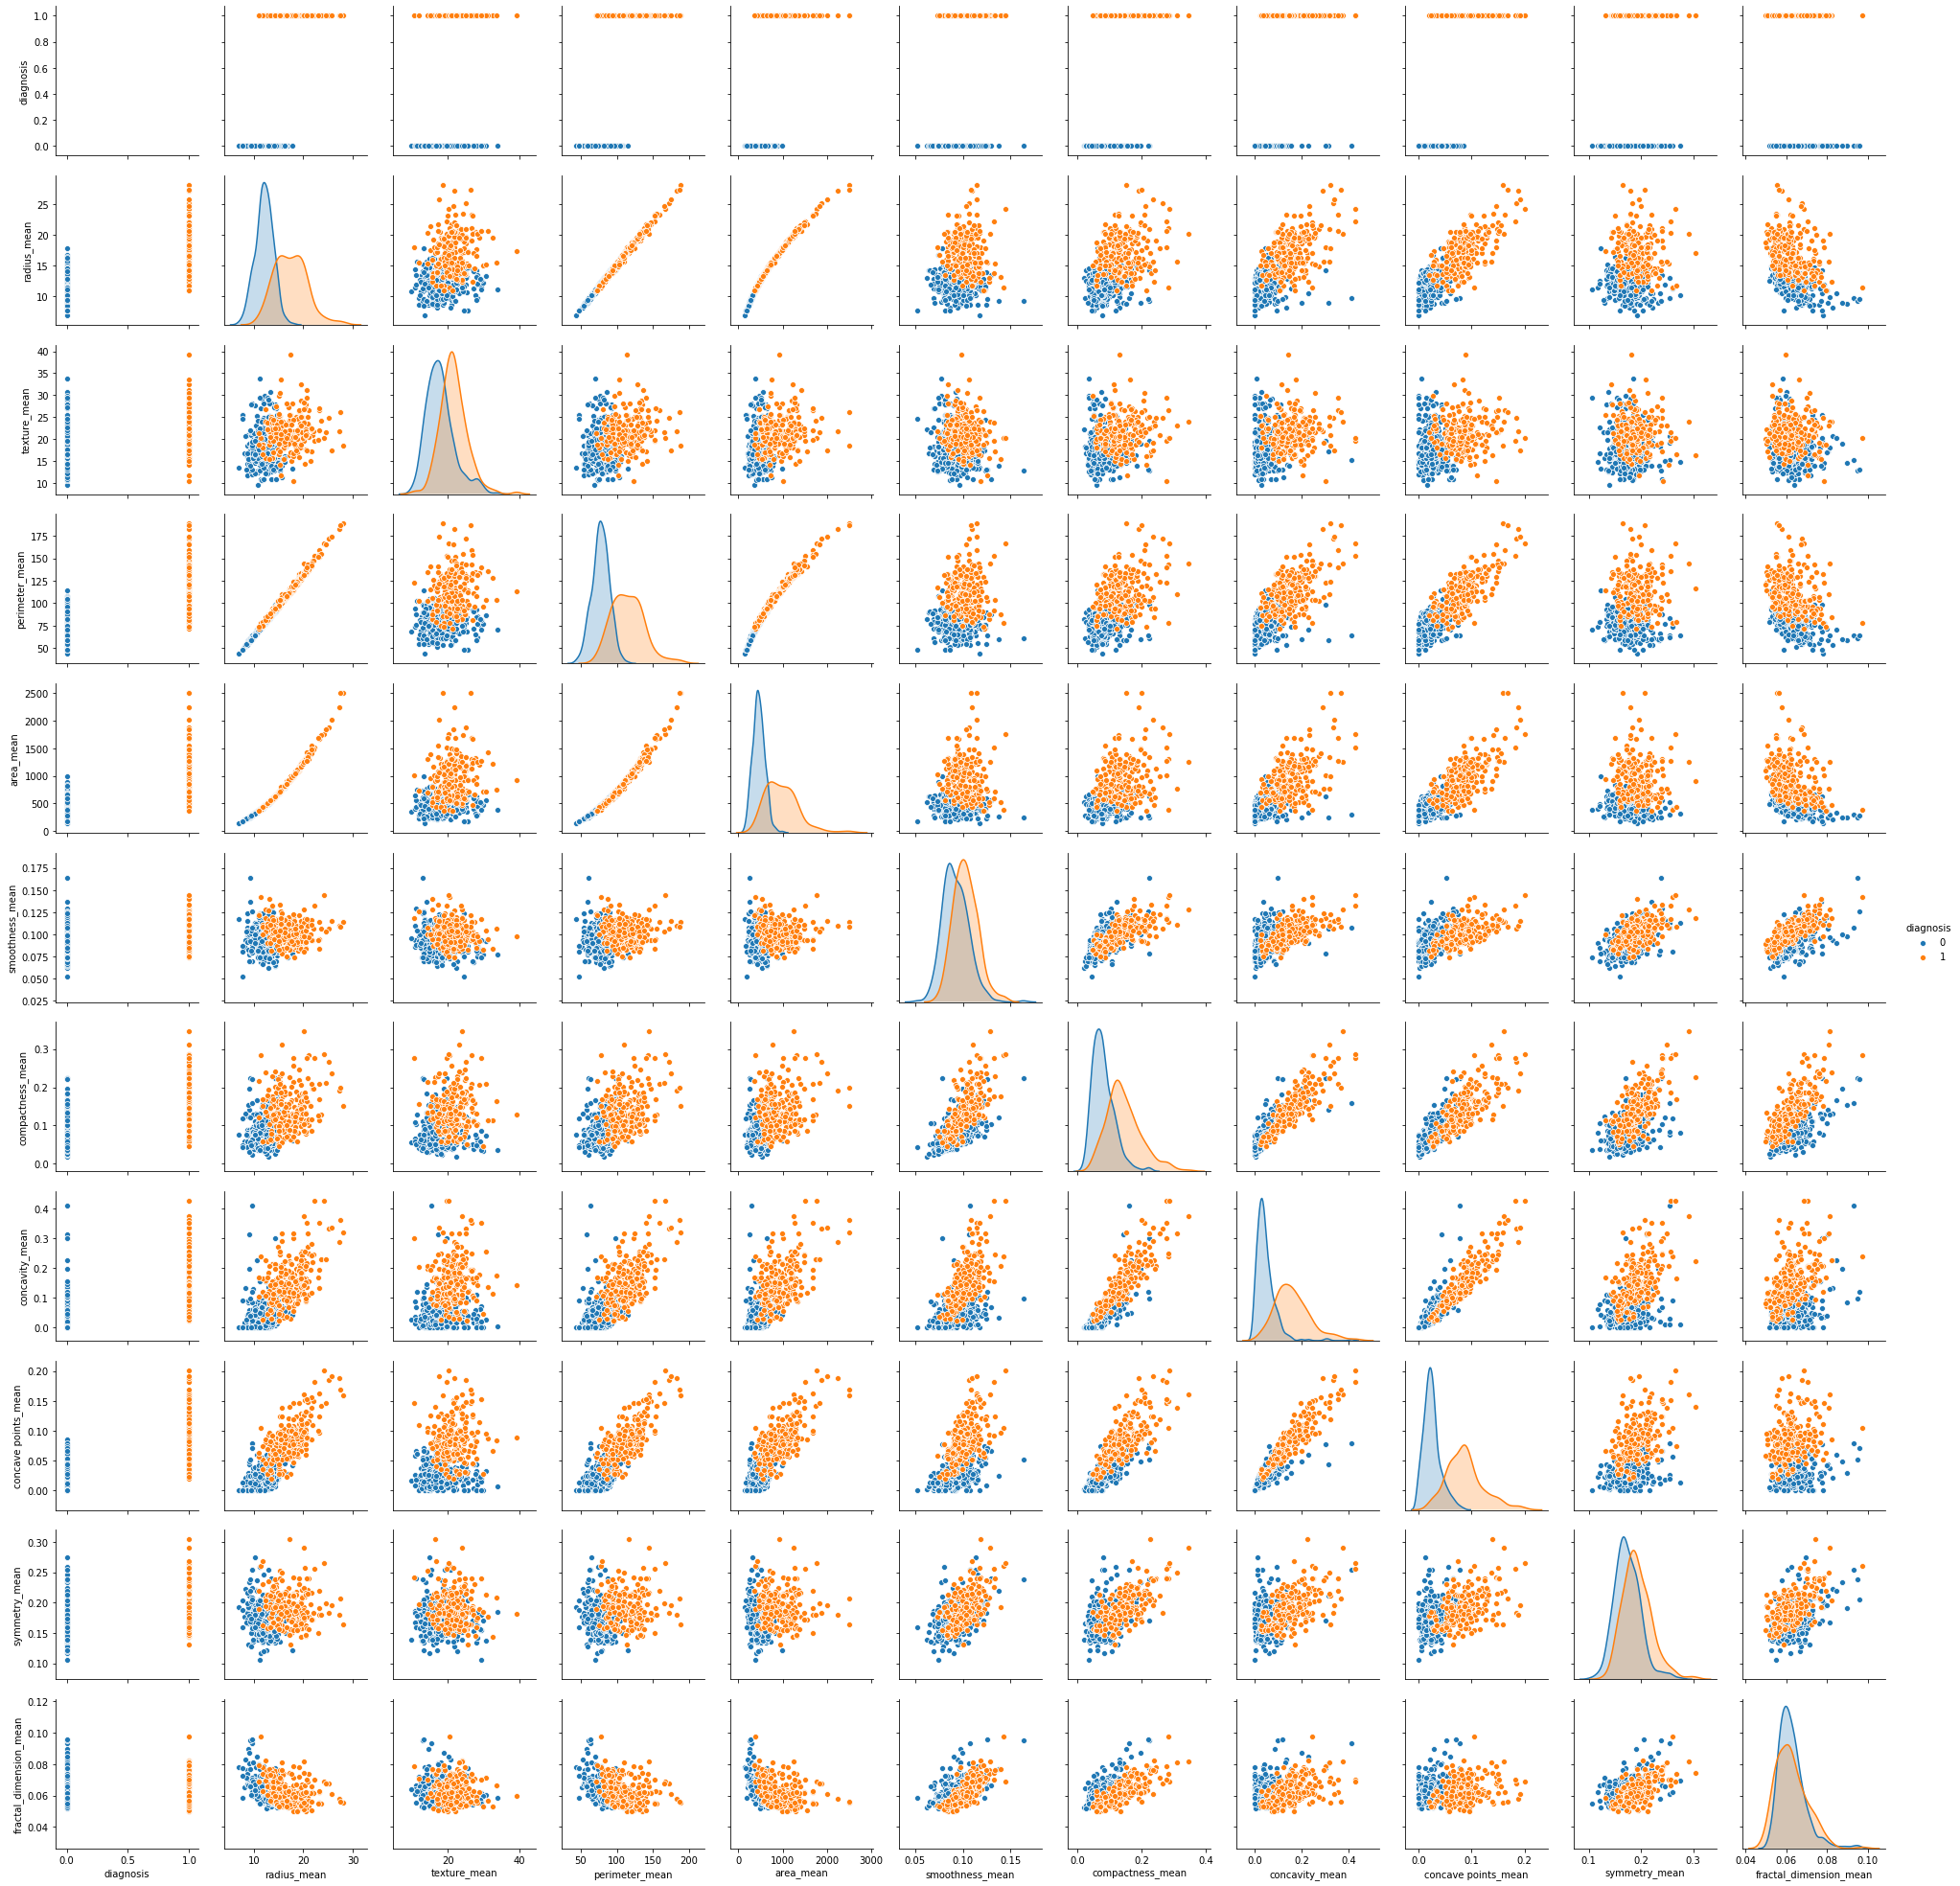

In [53]:
#scatter plot
sns.pairplot(data.iloc[:,1:12],hue='diagnosis')

Comme nous le voyons ci-dessus, les valeurs moyennes du rayon cellulaire, du périmètre, de la zone, de la compacité, de la concavité et des points concaves seront utilisées dans la classification du cancer.

configuration des données pour le modèle en fractionnant d'abord l'ensemble de données en un ensemble de données d'entités également appelé ensemble de données indépendant (X) et un ensemble de données cible également appelé ensemble de données dépendant (Y).

In [11]:
X = data.iloc[:, 2:32].values 
Y = data.iloc[:, 1].values 

## Feature Scaling

Mettez les données à l'échelle pour amener toutes les entités au même niveau de magnitude

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

## Grid Search

l'essaie de différents modèles avec différents hyperparameters en utilisons Grid Search

In [177]:
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10],
            'solver': ['newton-cg','lbfgs','liblinear','sag','saga']
        }
    },
    'svm': {
        'model': svm.SVC(),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid'],
            'gamma': [0.001,0.01,0.1,1,'auto']
        }  
    },
    'Decision_Tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20],
            'criterion': ['gini','entropy']
        }
    },
    'Boosting' : {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [20,30,50,80],
            'learning_rate': [0.5,1,5,10]
        }
    },
    'neural_network' : {
        'model': MLPClassifier(),
        'params': {
            'hidden_layer_sizes': [80,100,150,200],
            'activation': ['identity','logistic','tanh','relu'],
            'solver': ['lbfgs','sgd','adam'],
            'learning_rate':['constant','invscaling','adaptive'],
            'learning_rate_init': [0.0001,0.001,0.01,0.1]
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, Y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    


In [179]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,logistic_regression,0.978910,"{'C': 1, 'solver': 'newton-cg'}"
1,svm,0.978910,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
2,Decision_Tree,0.943761,{'criterion': 'entropy'}
3,random_forest,0.959578,"{'criterion': 'entropy', 'n_estimators': 20}"
4,Boosting,0.971880,"{'learning_rate': 1, 'n_estimators': 80}"
5,neural_network,0.982425,"{'activation': 'tanh', 'hidden_layer_sizes': 2..."


In [180]:
df['best_params'][5]

{'activation': 'tanh',
 'hidden_layer_sizes': 200,
 'learning_rate': 'invscaling',
 'learning_rate_init': 0.0001,
 'solver': 'adam'}

Divisez les données en 80% de formation et 20% d'ensembles de données de test.

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

## mesures d'évaluation

les mesures d'évaluation pour mesurer quantitativement les performances de prédiction du risque cancer du sein, y compris la précision de prédiction globale (ACC), la précision (PE),la spécificité (SPE), le coefficient de corrélation de Matthew (MCC), les valeurs de score F 1 , et la courbe caractéristique de fonctionnement du récepteur (AUC)

In [113]:
import math  
def categorical_probas_to_classes(p):
    return np.argmax(p, axis=1)

def calculate_performace(test_num, pred_y,  labels):
    tp =0
    fp = 0
    tn = 0
    fn = 0
    for index in range(test_num):
        if labels[index] ==1:
            if labels[index] == pred_y[index]:
                tp = tp +1
            else:
                fn = fn + 1
        else:
            if labels[index] == pred_y[index]:
                tn = tn +1
            else:
                fp = fp + 1               
            
    acc = float(tp + tn)/(tp + tn + fn + fp)
    precision = float(tp)/(tp+ fp)
    sensitivity = float(tp)/ (tp + fn )
    specificity = float(tn)/(tn + fp )
    mcc = float(tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
    f1=float(tp*2)/(tp*2+fp+fn)
    return acc, precision, sensitivity, specificity, mcc, f1

## hyperparametres

le test d'hyperparametres

In [114]:
names = [
    "Logistic Regression", "SVM", "Decision Tree", "Random Forest", "Boosting",
    "Artificial Neural Network"
]
classifiers = [
    LogisticRegression(C=1,solver= "newton-cg"),
    svm.SVC(probability=True, C=10, gamma=0.01,kernel= 'rbf'),
    DecisionTreeClassifier(criterion="entropy"),
    RandomForestClassifier(criterion="entropy",n_estimators=20),
    AdaBoostClassifier(learning_rate= 1,n_estimators=80),
    MLPClassifier(activation= "tanh",hidden_layer_sizes= 200,learning_rate= "invscaling",learning_rate_init= 0.0001,solver="adam")
]

In [115]:
from tensorflow_core.python.keras.utils import np_utils
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
cvscores = []
models=[]
for name, clf in zip(names, classifiers):
    clf=clf.fit(X_train, y_train)
    models.append(clf)
    y_score = clf.predict_proba(X_test)
    y_score = categorical_probas_to_classes(y_score)

    acc, precision, sensitivity, specificity, mcc, f1 = calculate_performace(
        len(y_score), y_score, y_test)
    print((
        '%s:acc=%f,precision=%f,sensitivity=%f,specificity=%f,mcc=%f,roc_auc=%f'
        % (name, acc, precision, sensitivity, specificity, mcc, roc_auc)))
    cvscores.append(
        [acc, precision ,sensitivity, specificity, mcc, roc_auc])

Logistic Regression:acc=0.964912,precision=0.975610,sensitivity=0.930233,specificity=0.985915,mcc=0.925285,roc_auc=0.997685
SVM:acc=0.982456,precision=0.976744,sensitivity=0.976744,specificity=0.985915,mcc=0.962660,roc_auc=0.997685
Decision Tree:acc=0.921053,precision=0.886364,sensitivity=0.906977,specificity=0.929577,mcc=0.832879,roc_auc=0.997685
Random Forest:acc=0.956140,precision=0.975000,sensitivity=0.906977,specificity=0.985915,mcc=0.906811,roc_auc=0.997685
Boosting:acc=0.956140,precision=0.975000,sensitivity=0.906977,specificity=0.985915,mcc=0.906811,roc_auc=0.997685
Artificial Neural Network:acc=0.991228,precision=1.000000,sensitivity=0.976744,specificity=1.000000,mcc=0.981416,roc_auc=0.997685


C:\Users\laara\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [116]:
scores=pd.DataFrame(cvscores,index =['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Boosting',
    'Artificial Neural Network'],columns =['accuracy', 'precision' ,'sensitivity', 'specificity', 'mcc', 'roc_auc']) 
scores

,accuracy,precision,sensitivity,specificity,mcc,roc_auc
Logistic Regression,0.964912,0.975610,0.930233,0.985915,0.925285,0.997685
SVM,0.982456,0.976744,0.976744,0.985915,0.962660,0.997685
Decision Tree,0.921053,0.886364,0.906977,0.929577,0.832879,0.997685
Random Forest,0.956140,0.975000,0.906977,0.985915,0.906811,0.997685
Boosting,0.956140,0.975000,0.906977,0.985915,0.906811,0.997685
Artificial Neural Network,0.991228,1.000000,0.976744,1.000000,0.981416,0.997685


## Roc Curve

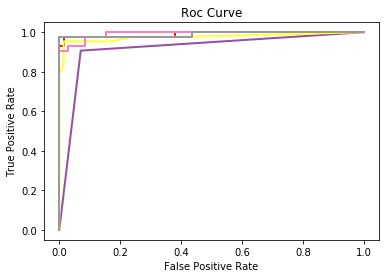

In [117]:
lw = 2
i = 0
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
for name, clf in zip(names, models): 
    y_score = clf.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test,  y_score[::,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr,
        tpr,
        lw=lw,
        color=plt.cm.Set1(i / 5.),
        label='ROC %s (area = %0.2f%%)' % (name, (roc_auc * 100 )))
    i += 1

## Matrice de confusion 

la matrice de confusion et la précision des modèles sur les données de test. La matrice de confusion nous indique combien de patients chaque modèle a mal diagnostiqué (nombre de patients atteints de cancer qui ont été diagnostiqués à tort comme n'ayant pas de cancer faux négatif , et le nombre de patients qui n'avaient pas de cancer qui ont été mal diagnostiqués avec un cancer faux positif ) et le nombre de diagnostics corrects, les vrais positifs et les vrais négatifs .

In [118]:
from sklearn.metrics import confusion_matrix
for i in range(len(models)):
  cm = confusion_matrix(y_test, models[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('{} Testing Accuracy = "{}!"'.format(names[i],  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[70  1]
 [ 3 40]]
Logistic Regression Testing Accuracy = "0.9649122807017544!"

[[71  0]
 [ 1 42]]
SVM Testing Accuracy = "0.9912280701754386!"

[[66  5]
 [ 4 39]]
Decision Tree Testing Accuracy = "0.9210526315789473!"

[[70  1]
 [ 4 39]]
Random Forest Testing Accuracy = "0.956140350877193!"

[[70  1]
 [ 4 39]]
Boosting Testing Accuracy = "0.956140350877193!"

[[71  0]
 [ 1 42]]
Artificial Neural Network Testing Accuracy = "0.9912280701754386!"



## Conclusion

D'après l'exactitude et les mesures ci-dessus, le modèle qui a obtenu les meilleurs résultats sur les données de test était le classificateur de Artificial Neural Network avec un score de précision d'environ 100%. donc on a choisi ce modèle pour détecter les cellules cancéreuses chez les patients. on remarque que parmi les meilleurs modeles qui